<a href="https://colab.research.google.com/github/tshabalalasibongile/machine-learning-chemistry-projects/blob/main/wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sibongile Tshabalala (2356121)

# Wine Classification

# **Task 1: Data Exploration**

# **About this dataset**

This notebook applies machine learning techniques to classify wines into their respective classes based on their chemical properties. The dataset contains 178 samples, each belonging to one of three classes.

# **Importing Dataset**

In [ ]:
pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the dataset
df = pd.read_csv('wine.csv')

In [ ]:
# Dataset info and statistics
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Wine     Alcohol  Malic.acid         Ash         Acl          Mg  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoid.phenols     Proanth   Color.int  \
count  178.000000  178.000000            178.000000  178.000000  178.000000   
mean     2.295112    2.029270              0.361854    1.590899    5.058090   
std      0.625851    0.998859              0.124453    0.572359    2.318286   
min      0.980000    0.340000              0.130000    0.410000    1.280000   
25%      1.742500    1.205000              0.270000    1.250000    3.220000   
50%      2.355000    2.135000              0.340000    1.555000    4.690000   
75%      2.800000    2.875000              0.437500    1.950000    6.200000   
max      3.880000    5.080000              0.660000    3.580000   13.000000   

              Hue          OD      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

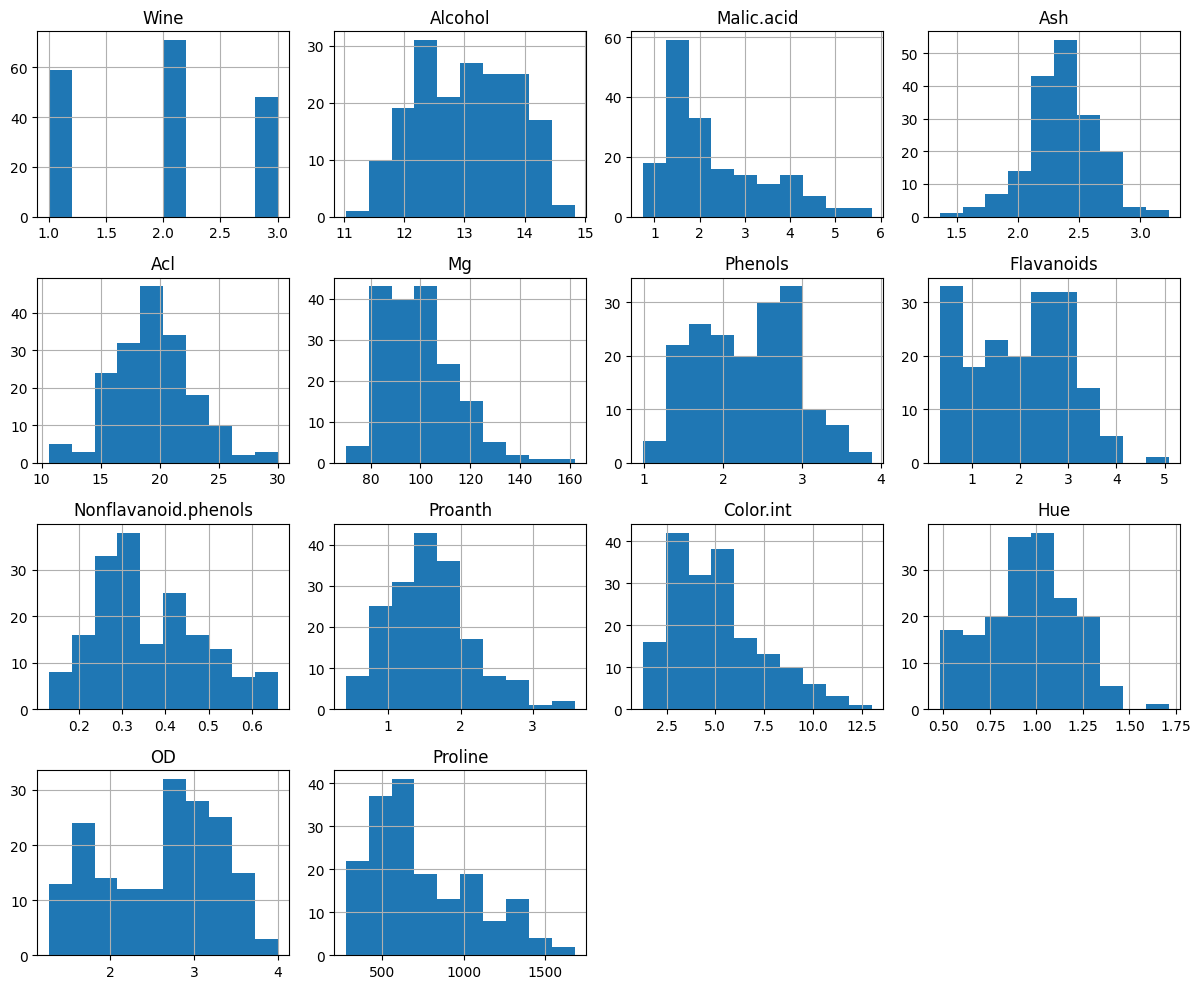

In [ ]:
# Histograms
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


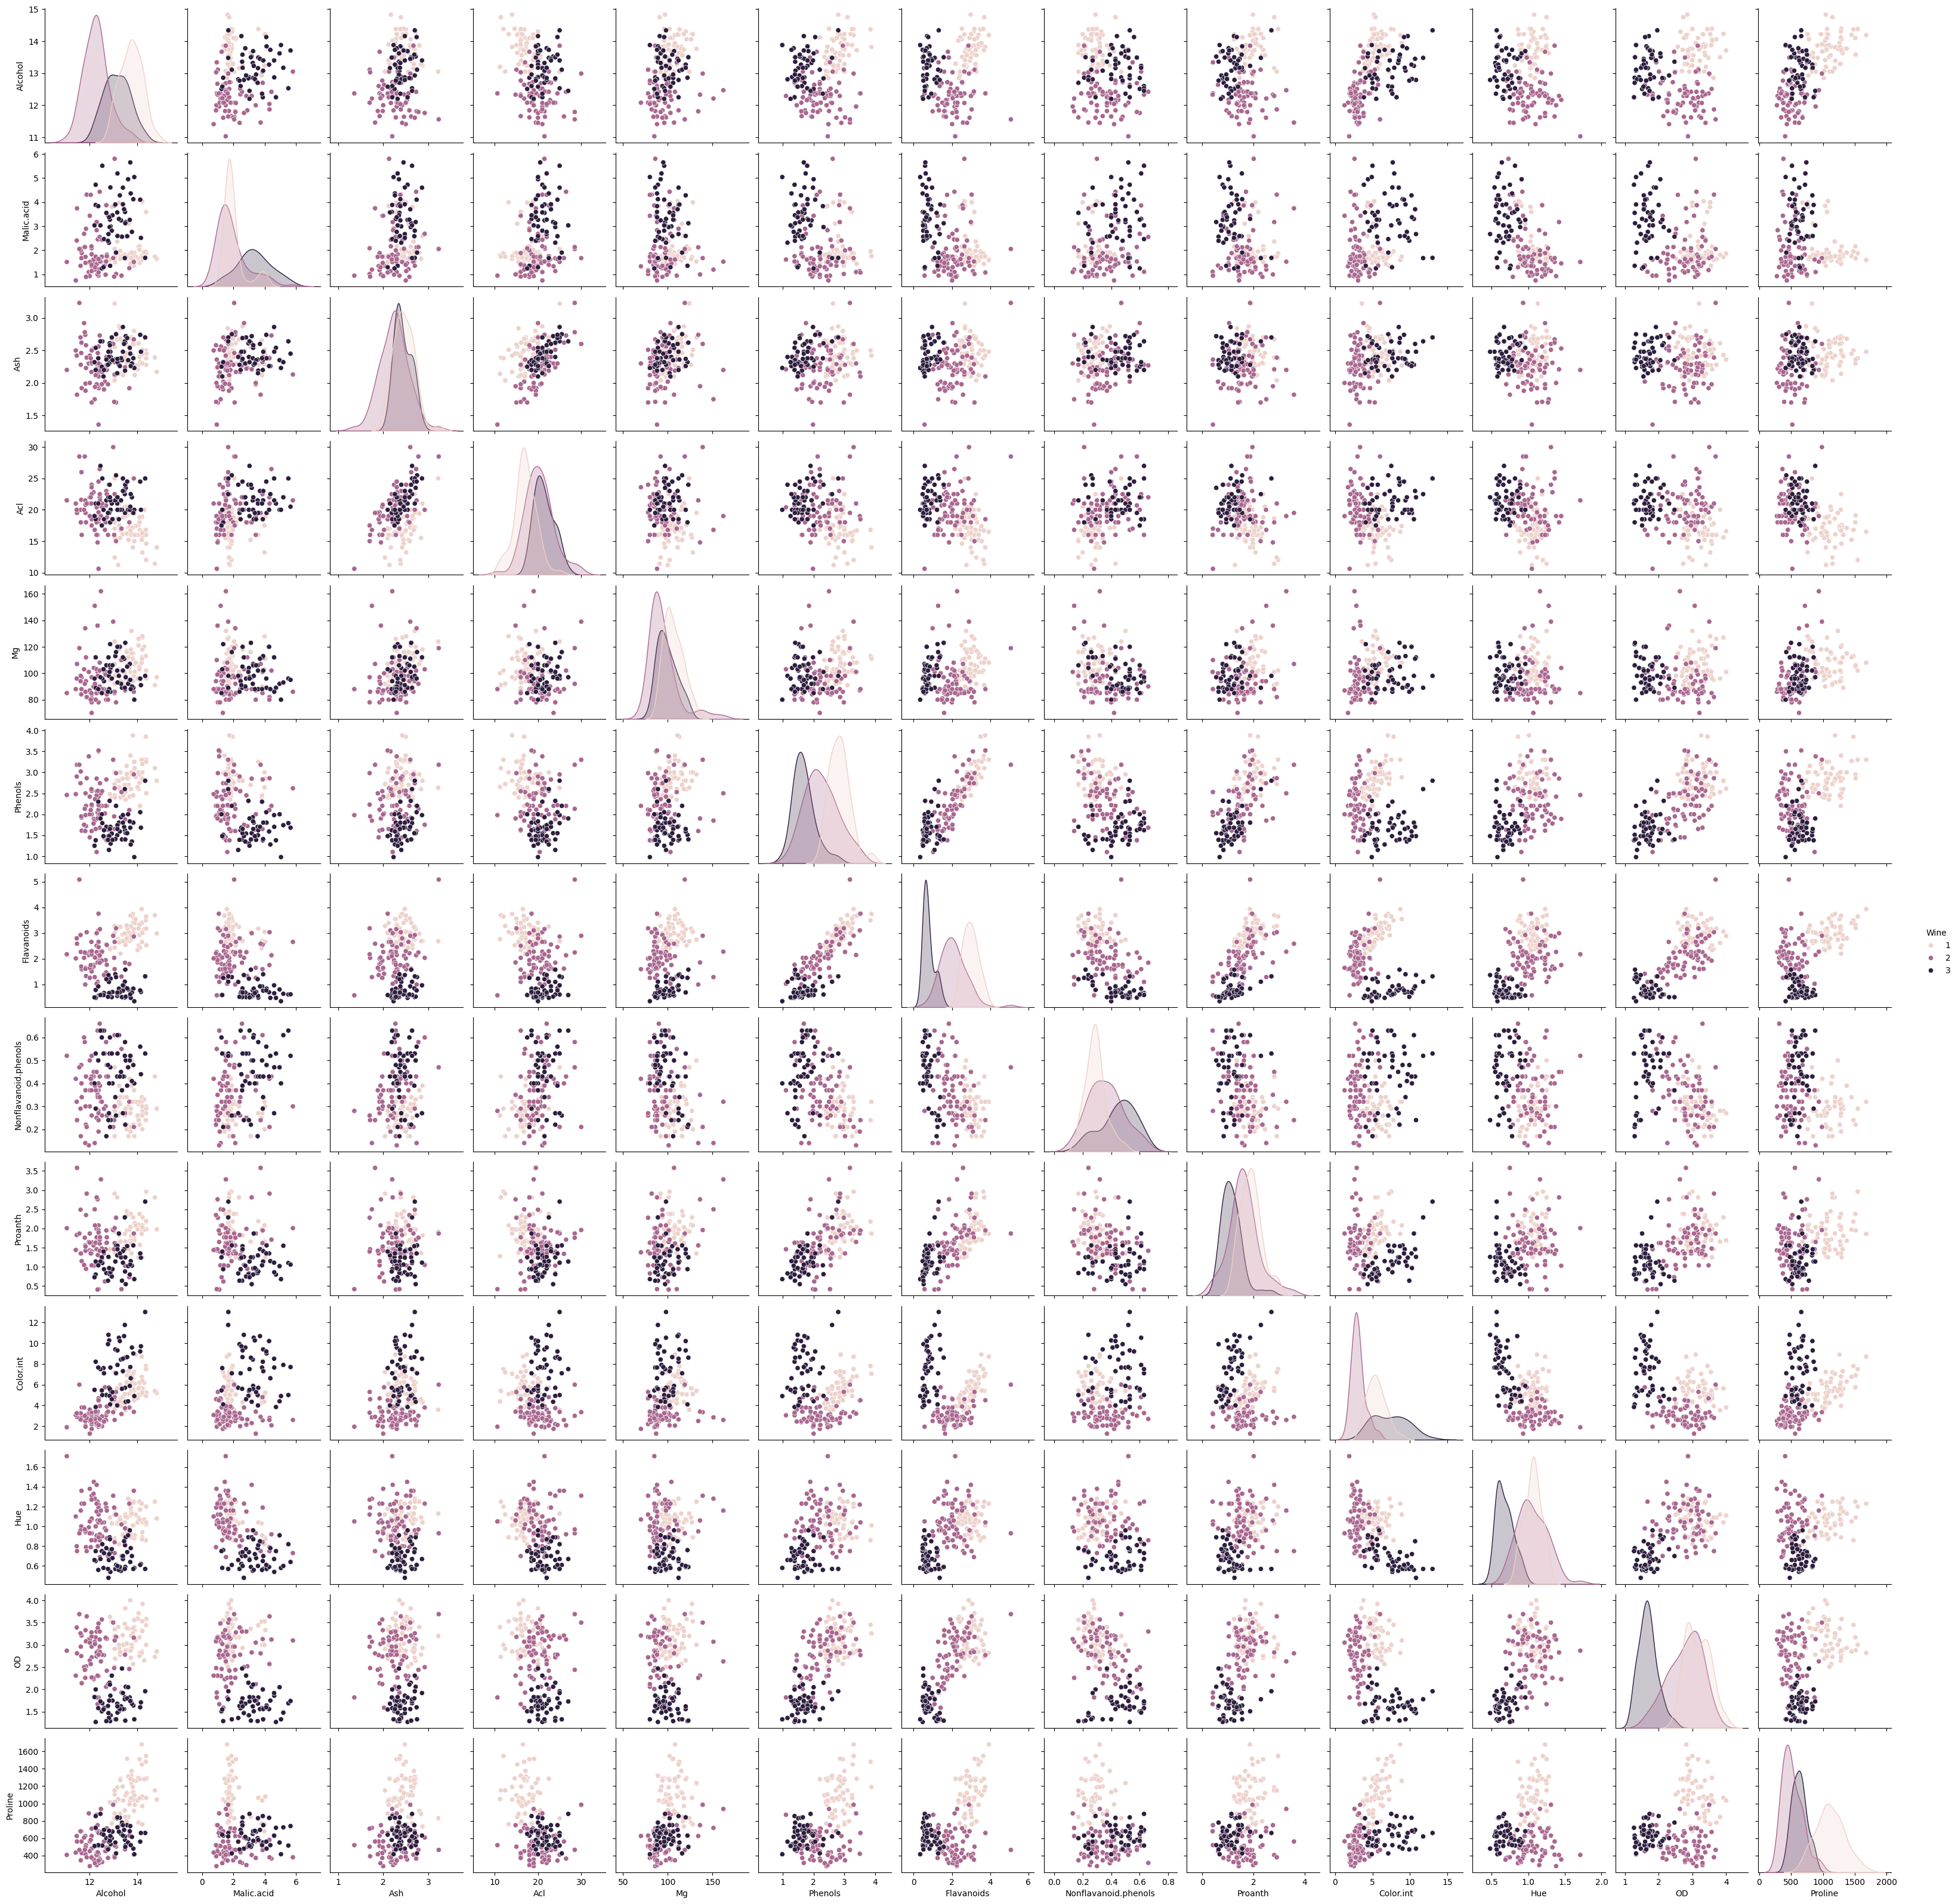

In [ ]:
# Pairplot
sns.pairplot(df, hue='Wine')
plt.show()


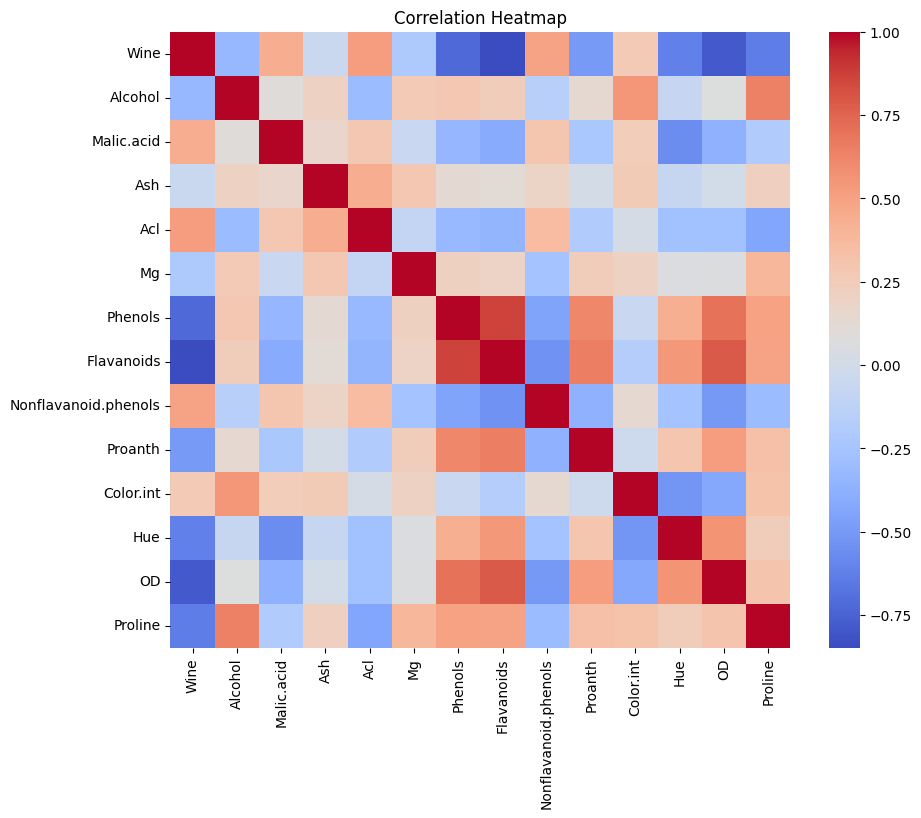

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

After loading the wine dataset, it was confirmed that all features and the target variable were complete, with no missing values. Summary statistics showed the range and variability of each chemical property, highlighting the need for feature scaling before model training.

The pairplot revealed that some feature combinations, such as Flavanoids versus Color intensity, clearly separate wine classes, suggesting these features are important for classification. The correlation heatmap showed strong positive relationships between certain features, like Flavanoids and Color intensity, indicating they carry related information.

Overall, the dataset is complete and well-structured, with features such as Flavanoids, Color intensity, and Proline appearing most relevant for distinguishing wine types.

# **Task 2: Data Preprocessing**

In [ ]:
#We will scale the features and split the dataset into training and testing sets.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Check for missing values
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [ ]:
X = df.drop('Wine', axis=1)
y = df['Wine']

In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

The preprocessing and data-splitting steps prepared the dataset for model training and evaluation. By checking for missing values, it was confirmed that the dataset was complete, so no imputation was needed. Standardizing the features ensured that all chemical properties were on the same scale, which is especially important for distance-based models like KNN and algorithms sensitive to feature magnitude like SVM.

The dataset was split into training and testing sets with a 70-30 ratio, preserving the original class distribution due to stratification. This ensures that all wine classes are fairly represented in both sets, reducing bias in model evaluation. After scaling, the training and test features are ready for modeling, with the test data transformed based on the training data to prevent information leakage.

As a result, the models trained on this preprocessed data can learn patterns effectively and be evaluated reliably, with the test set providing an accurate measure of generalization performance.

# **Task 3: Model Selection**

In [ ]:
#We will train several classifiers: Decision Tree, k-NN, and SVM.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
# Initialize models
decision_tree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='rbf', probability=True, random_state=42)
random_forest = RandomForestClassifier(random_state=42)

# Train models
decision_tree.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)
random_forest.fit(X_train_scaled, y_train)

# Store models in a dictionary
trained_models = {
    "DecisionTree": decision_tree,
    "KNN": knn,
    "SVM": svm,
    "RandomForest": random_forest
}

To classify the wines based on their chemical properties, several machine learning classifiers were prepared. The first step involved importing the required algorithms from scikit-learn. The DecisionTreeClassifier was imported to create a single decision tree model, which splits the data based on feature values to classify samples and provides interpretable results. The RandomForestClassifier was imported as an ensemble method, combining multiple decision trees to improve accuracy and reduce overfitting. The KNeighborsClassifier implements the k-nearest neighbors algorithm, predicting the class of a sample based on the majority class among its nearest neighbors. Finally, the SVC class from sklearn.svm was imported to implement Support Vector Machines, which find optimal hyperplanes to separate classes and can model non-linear relationships using kernel functions like the radial basis function.

After importing these algorithms, each model was initialized with specific parameters to ensure reproducibility and appropriate configuration. The Decision Tree and Random Forest models were assigned a fixed random state, the KNN model was set to consider five nearest neighbors, and the SVM model was configured to output probabilities for evaluation purposes. Each model was then trained on the scaled training dataset, allowing it to learn the relationships between the chemical properties and wine classes.

All trained models were organized into a dictionary called trained_models, which makes it convenient to perform subsequent analyses such as feature importance evaluation, model comparison, and performance assessment. This structured workflow ensures that the models can be efficiently evaluated and compared, providing a clear understanding of which classifier best predicts wine types.

# **Task 4: Model Evaluation**

In [ ]:
# importing required libraries for model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import auc, ConfusionMatrixDisplay

In [ ]:
# Dictionary to store accuracy scores
results = {}



=== DecisionTree ===
Accuracy: 0.963
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.94      0.97        18
           2       0.91      1.00      0.95        21
           3       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



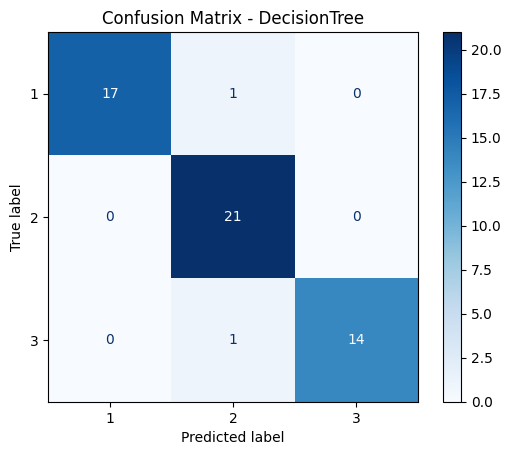

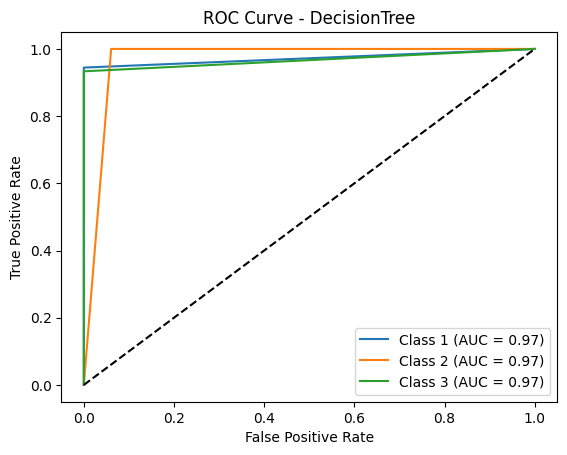


=== KNN ===
Accuracy: 0.9444
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      0.86      0.92        21
           3       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



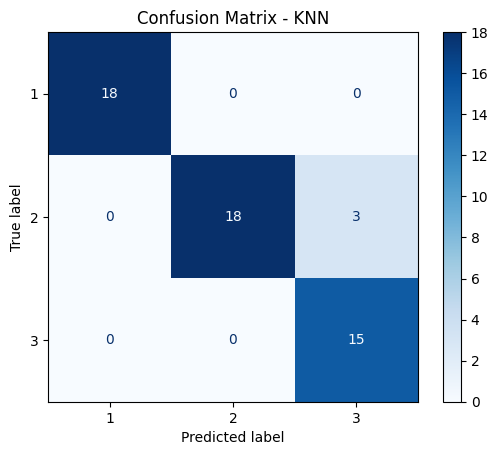

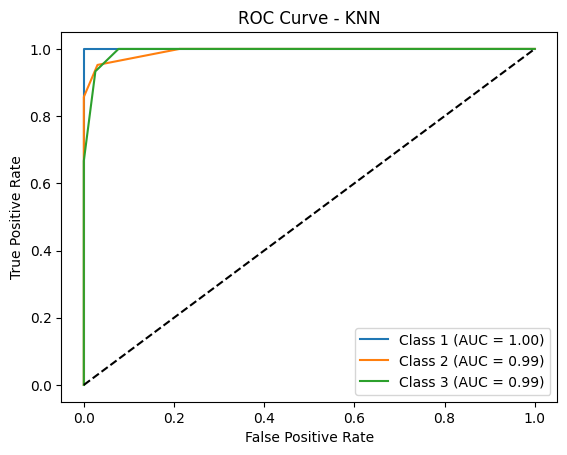


=== SVM ===
Accuracy: 0.9815
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       0.95      1.00      0.98        21
           3       1.00      0.93      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



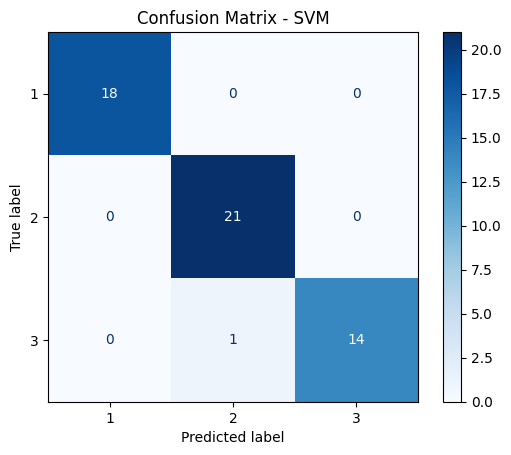

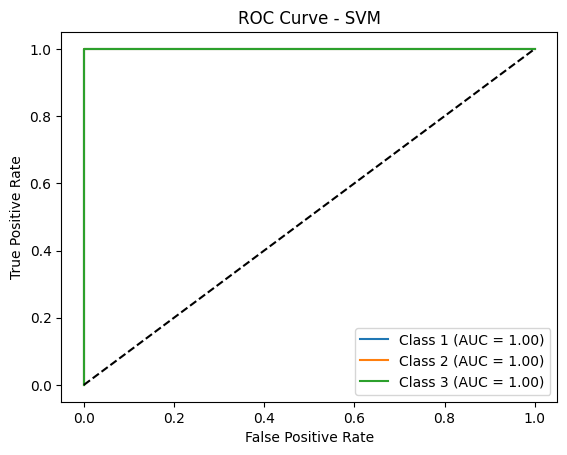


=== RandomForest ===
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



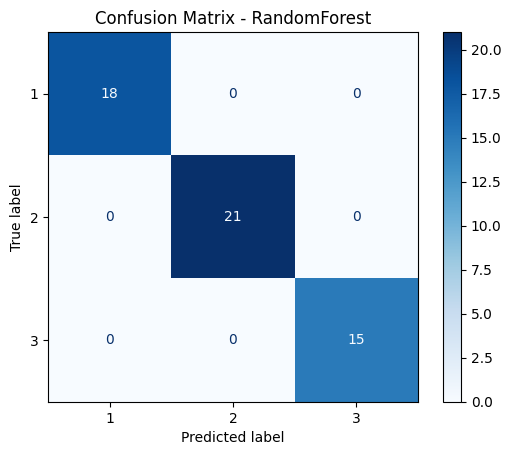

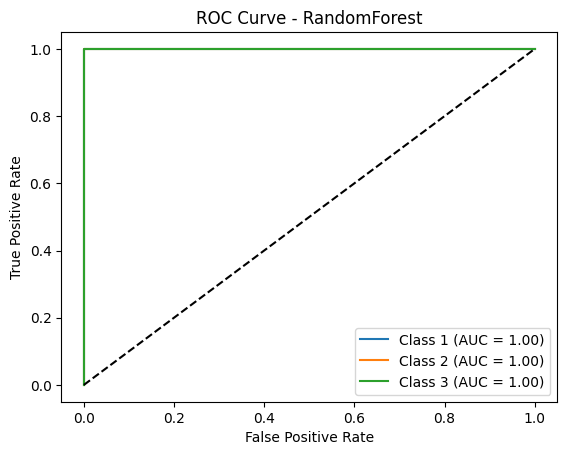

In [ ]:
for name, model in trained_models.items():
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)

    print(f"\n=== {name} ===")
    print("Accuracy:", round(acc, 4))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    # Replace wine.target_names with actual class labels
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # ROC Curve (only works with probability outputs)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)
        fpr = {}
        tpr = {}
        roc_auc = {}
        # Iterate through the number of classes
        for i in range(len([1, 2, 3])): # Replace wine.target_names with actual class labels
            # Need to binarize the true labels for roc_curve
            y_test_bin = (y_test == (i + 1)).astype(int) # Adjust index to match class labels (1, 2, 3)
            fpr[i], tpr[i], _ = roc_curve(y_test_bin, y_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            plt.plot(fpr[i], tpr[i], label=f"Class {i+1} (AUC = {roc_auc[i]:.2f})") # Adjust label to match class labels

        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f"ROC Curve - {name}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.show()

Task 4: Model Evaluation assesses the performance of each trained classifier on the test dataset using multiple metrics and visualizations. This approach provides a deeper understanding of how well each model predicts wine classes beyond simple accuracy.

For each model, the accuracy score indicates the overall proportion of correctly classified wine samples. For example, the Random Forest model achieved perfect classification with an accuracy of 1.0, while SVM, Decision Tree, and KNN achieved slightly lower accuracies of 0.9815, 0.963, and 0.9444, respectively. These scores provide a first indication of which models are most effective.

The classification report breaks performance down by class, reporting precision, recall, and F1-score. Precision measures the proportion of correct predictions for a class out of all predictions made for that class, recall measures the proportion of actual samples correctly identified, and the F1-score balances these two metrics. High precision and recall across all classes indicate that the model reliably distinguishes between different wine types. In practice, this report often highlights if certain classes are misclassified more frequently than others, even when overall accuracy is high.

The confusion matrix visually summarizes how many samples from each actual class were correctly or incorrectly predicted. For example, a confusion matrix for Random Forest shows all samples along the diagonal, confirming perfect classification. In contrast, KNN or Decision Tree might have a few misclassifications, where some samples from one class are predicted as another. This visualization makes it easy to identify which classes are most often confused.

The ROC curve and AUC provide insight into the models’ ability to distinguish between classes. For each wine class, the true labels are binarized, and a one-vs-rest ROC curve is plotted. The curve shows the trade-off between the true positive rate and false positive rate for different probability thresholds, while the AUC quantifies the model’s discriminative ability. A higher AUC indicates that the model is better at correctly ranking positive samples higher than negative ones. For the Random Forest model, the AUC is close to 1 for all classes, reflecting its robust ability to separate all wine types. Other models like SVM also perform well but may show slightly lower AUC values for some classes.

Overall, the evaluation shows that Random Forest is the most reliable model, achieving perfect accuracy, high precision, recall, and F1-scores across all classes, as well as near-perfect AUC values. SVM is also strong, with slightly lower but still excellent performance. Decision Tree and KNN perform well but show minor weaknesses in misclassifying certain classes. This comprehensive evaluation confirms that ensemble methods and models with robust decision boundaries are particularly effective for wine classification, while simpler models may struggle slightly with class separability.

# Task 5: Model Comparison




=== Model Comparison ===
DecisionTree: 0.963
KNN: 0.9444
SVM: 0.9815
RandomForest: 1.0


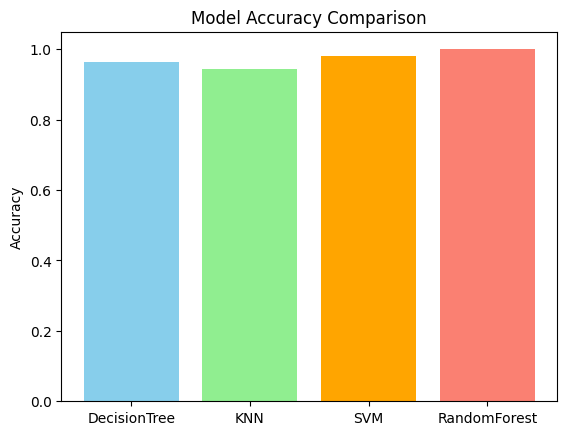

In [ ]:
print("\n=== Model Comparison ===")
results = {}
for name, model in trained_models.items():
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

# Print results
for model, acc in results.items():
    print(f"{model}: {round(acc, 4)}")

# Bar chart comparison
plt.bar(results.keys(), results.values(), color=["skyblue","lightgreen","orange","salmon"])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


The model comparison highlights the relative performance of four different classifiers: Decision Tree, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), and Random Forest on the wine classification task. Accuracy, which measures the proportion of correctly predicted wine samples, was used as the evaluation metric.

The Random Forest model achieved the highest accuracy of 1.0, indicating perfect classification of the test samples. This result suggests that the ensemble approach, which combines multiple decision trees and aggregates their predictions, is particularly effective at capturing complex relationships among the chemical properties of wines.

The SVM model performed next best, with an accuracy of 0.9815, showing strong predictive ability. Support Vector Machines are powerful for classification tasks, especially when the decision boundaries between classes are non-linear, which is likely the case for this wine dataset.

The Decision Tree classifier achieved an accuracy of 0.963, slightly lower than SVM but still very high. While decision trees are interpretable and can model non-linear relationships, single trees are more prone to overfitting or failing to generalize perfectly compared to ensemble methods like Random Forest.

The KNN model had the lowest accuracy among the four, at 0.9444. Although KNN can be effective for small datasets, its performance depends heavily on the choice of k and distance metrics. It may struggle to fully capture complex feature interactions in the wine data compared to tree-based or SVM models.

Overall, the comparison demonstrates that ensemble and margin-based methods, such as Random Forest and SVM, outperform simpler models on this dataset, with Random Forest being the most robust choice for wine classification. The bar chart visualization reinforces this ranking, providing a clear and immediate comparison of each model’s predictive capability.

# **Task 6: Intrepretation**


=== Feature Importance / Interpretation ===


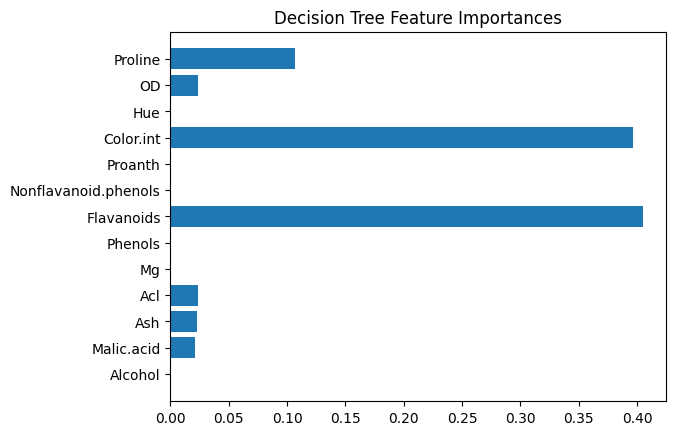

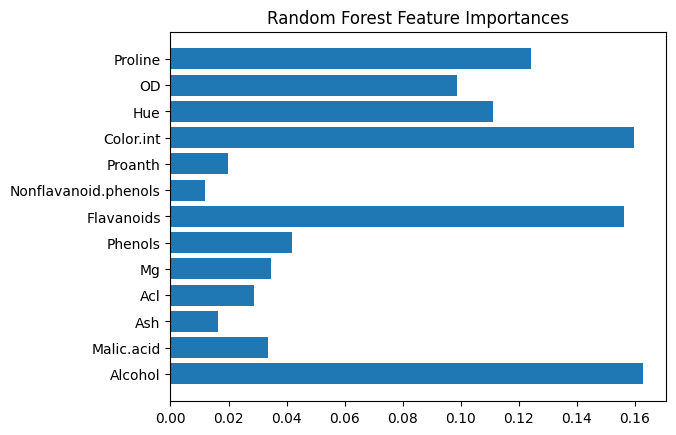

From feature importance, certain chemical properties (like alcohol, flavanoids, and color intensity) tend to be the most useful in distinguishing between wine classes.


In [ ]:
print("\n=== Feature Importance / Interpretation ===")

# Decision Tree and Random Forest give feature importance
if "DecisionTree" in trained_models:
    importances = trained_models["DecisionTree"].feature_importances_
    plt.barh(X.columns, importances)
    plt.title("Decision Tree Feature Importances")
    plt.show()

if "RandomForest" in trained_models:
    importances = trained_models["RandomForest"].feature_importances_
    plt.barh(X.columns, importances)
    plt.title("Random Forest Feature Importances")
    plt.show()

print("From feature importance, certain chemical properties (like alcohol, flavanoids, and color intensity) tend to be the most useful in distinguishing between wine classes.")

Higher feature importance scores indicate a greater impact on the classification outcome. Based on the feature importance plots from the Decision Tree and Random Forest models, the chemical properties most influential in distinguishing between wine classes can be identified.

For the Random Forest model, the top features include Flavanoids, Proline, Color_int, and Alcohol. These features all have relatively high importance scores, with Flavanoids and Proline showing the highest contributions, indicating that they play the most critical role in driving the Random Forest classifier’s predictions.

For the Decision Tree model, Flavanoids and Color_int emerge as the most important features, followed by Proline in third place. These features have the highest importance scores, confirming their strong influence on the Decision Tree’s classification decisions.

Across both models, Flavanoids, Color intensity, and Proline consistently appear as top contributors, highlighting their robust association with wine class. Alcohol also appears as an important feature, particularly in the Random Forest model, indicating that it contributes meaningfully to distinguishing between wine types. Overall, these chemical properties collectively drive the classification performance and provide clear insights into the factors that differentiate wines.